In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

### **Dataset Loading**

In [ ]:
path = r"dataset2-1.csv"
df = pd.read_csv(path)

### **Dataset First View**

In [ ]:
df.head()

,cow,date,hour,IN_ALLEYS,REST,EAT,ACTIVITY_LEVEL,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,accidents,disturbance,mixing,management_changes,OK
0,7163,2015-03-02,1,185.517,3414.482,0.0,-755.64814,0,0,0,0,NaN,0,0,0,1,0,0,0
1,7163,2015-03-02,2,0.000,3599.999,0.0,-827.99977,0,0,0,0,NaN,0,0,0,1,0,0,0
2,7163,2015-03-02,3,10.661,3589.338,0.0,-823.84198,0,0,0,0,NaN,0,0,0,1,0,0,0
3,7163,2015-03-02,4,43.800,3556.199,0.0,-810.91777,0,0,0,0,NaN,0,0,0,1,0,0,0
4,7163,2015-03-02,5,17.167,3582.832,0.0,-821.30464,0,0,0,0,NaN,0,0,0,1,0,0,0


### **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  40247
Number of columns are:  19


**Displaying Column Names**


In [ ]:

print(df.columns)

Index(['cow', 'date', 'hour', 'IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL',
       'oestrus', 'calving', 'lameness', 'mastitis', 'LPS', 'acidosis',
       'other_disease', 'accidents', 'disturbance', 'mixing',
       'management_changes', 'OK'],
      dtype='object')


In [ ]:
# Step 4: Define behavioral and health-related features
behavioral_features = ['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']
health_indicators = ['oestrus', 'calving', 'lameness', 'mastitis',
                     'other_disease', 'accidents', 'disturbance',
                     'mixing', 'management_changes', 'OK']

In [ ]:
target_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS', 'acidosis', 'other_disease', 'accidents', 'disturbance', 'mixing', 'management_changes', 'OK']


print("Unique Value Counts per Event:")
for col in target_columns:
    value_counts = df[col].value_counts()
    print(f"{col}:")
    print(value_counts)
    print("---------------------------------")

Unique Value Counts per Event:
oestrus:
oestrus
0    40079
1      168
Name: count, dtype: int64
---------------------------------
calving:
calving
0    40247
Name: count, dtype: int64
---------------------------------
lameness:
lameness
0    39863
1      384
Name: count, dtype: int64
---------------------------------
mastitis:
mastitis
0    40175
1       72
Name: count, dtype: int64
---------------------------------
LPS:
Series([], Name: count, dtype: int64)
---------------------------------
acidosis:
acidosis
0    33743
1     6504
Name: count, dtype: int64
---------------------------------
other_disease:
other_disease
0    40055
1      192
Name: count, dtype: int64
---------------------------------
accidents:
accidents
0    40247
Name: count, dtype: int64
---------------------------------
disturbance:
disturbance
0    24143
1    16104
Name: count, dtype: int64
---------------------------------
mixing:
mixing
0    40247
Name: count, dtype: int64
---------------------------------
manage

### **Dataset Information**

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40247 entries, 0 to 40246
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cow                 40247 non-null  int64  
 1   date                40247 non-null  object 
 2   hour                40247 non-null  int64  
 3   IN_ALLEYS           40247 non-null  float64
 4   REST                40247 non-null  float64
 5   EAT                 40247 non-null  float64
 6   ACTIVITY_LEVEL      40247 non-null  float64
 7   oestrus             40247 non-null  int64  
 8   calving             40247 non-null  int64  
 9   lameness            40247 non-null  int64  
 10  mastitis            40247 non-null  int64  
 11  LPS                 0 non-null      float64
 12  acidosis            40247 non-null  int64  
 13  other_disease       40247 non-null  int64  
 14  accidents           40247 non-null  int64  
 15  disturbance         40247 non-null  int64  
 16  mixi

### **Duplicate Values**





In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### **Missing Values**


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

cow                       0
date                      0
hour                      0
IN_ALLEYS                 0
REST                      0
EAT                       0
ACTIVITY_LEVEL            0
oestrus                   0
calving                   0
lameness                  0
mastitis                  0
LPS                   40247
acidosis                  0
other_disease             0
accidents                 0
disturbance               0
mixing                    0
management_changes        0
OK                        0
dtype: int64

**Missing values percentage**

In [ ]:
null_percentage = (df.isnull()).mean() * 100
print(null_percentage)

cow                     0.0
date                    0.0
hour                    0.0
IN_ALLEYS               0.0
REST                    0.0
EAT                     0.0
ACTIVITY_LEVEL          0.0
oestrus                 0.0
calving                 0.0
lameness                0.0
mastitis                0.0
LPS                   100.0
acidosis                0.0
other_disease           0.0
accidents               0.0
disturbance             0.0
mixing                  0.0
management_changes      0.0
OK                      0.0
dtype: float64


**Matrix of missing values**

<Figure size 1500x800 with 0 Axes>

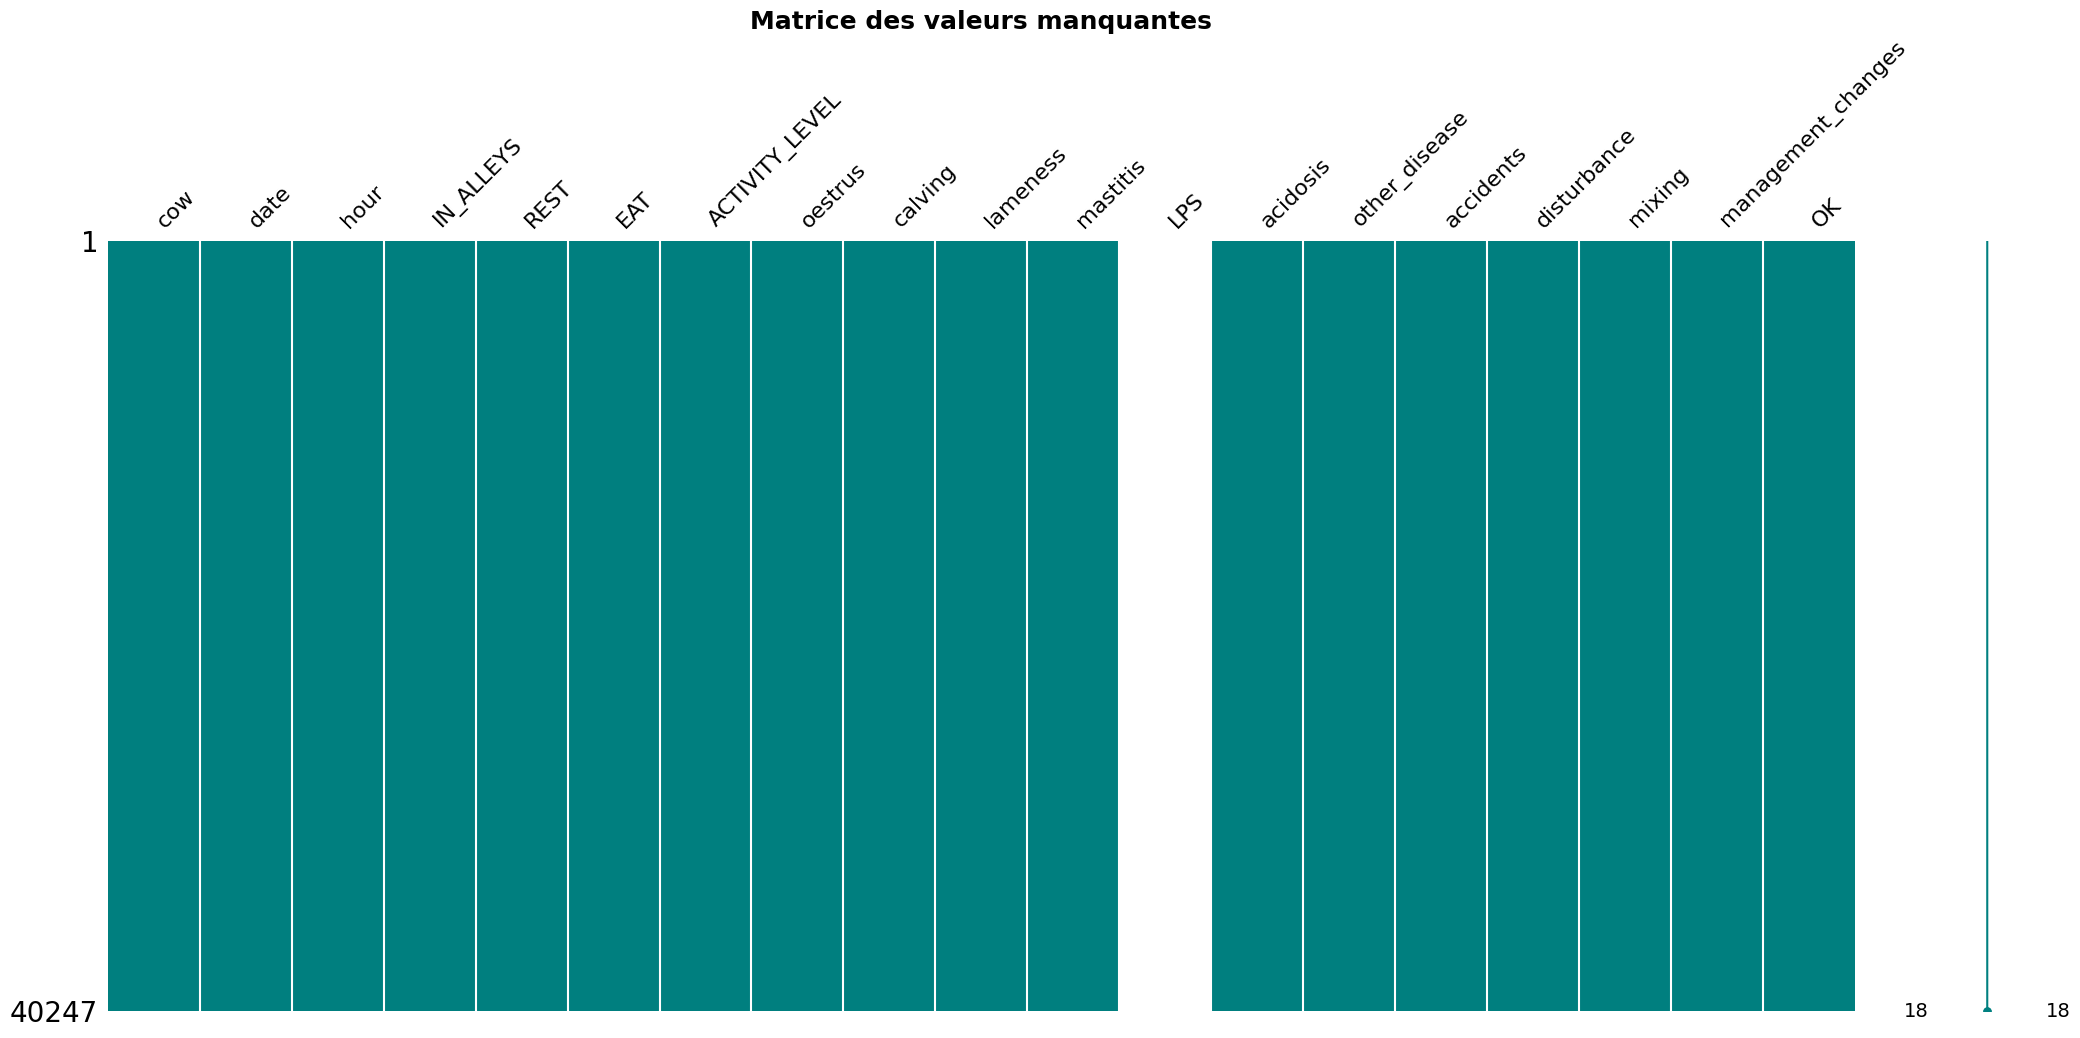

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt


data = pd.read_csv(path)


plt.figure(figsize=(15, 8))
msno.matrix(data, color=(0, 0.5, 0.5))  # Affichage des valeurs manquantes en matrice
plt.title("Matrice des valeurs manquantes", fontsize=18, fontweight='bold')
plt.show()

## **Null values**

In [ ]:
zero_counts = (df == 0).sum()
print(zero_counts)


cow                       0
date                      0
hour                      0
IN_ALLEYS              1409
REST                   4975
EAT                   14245
ACTIVITY_LEVEL            0
oestrus               40079
calving               40247
lameness              39863
mastitis              40175
LPS                       0
acidosis              33743
other_disease         40055
accidents             40247
disturbance           24143
mixing                40247
management_changes    36215
OK                    20424
dtype: int64


**Null values percentage**

In [ ]:
zero_percentage = (df == 0).mean() * 100
print(zero_percentage)


cow                     0.000000
date                    0.000000
hour                    0.000000
IN_ALLEYS               3.500882
REST                   12.361170
EAT                    35.393942
ACTIVITY_LEVEL          0.000000
oestrus                99.582578
calving               100.000000
lameness               99.045892
mastitis               99.821105
LPS                     0.000000
acidosis               83.839789
other_disease          99.522946
accidents             100.000000
disturbance            59.987080
mixing                100.000000
management_changes     89.981862
OK                     50.746640
dtype: float64


In [ ]:
import numpy as np

# Calcul des totaux
total_cells = df.size
null_count = df.isnull().sum().sum()
zero_count = (df == 0).sum().sum()

# Pourcentages globaux
null_percentage = (null_count / total_cells) * 100
zero_percentage = (zero_count / total_cells) * 100

# Affichage des résultats
print(f"Analyse Globale du Dataset ({df.shape[0]} lignes × {df.shape[1]} colonnes):")
print(f"1. Nombre total de cellules: {total_cells}")
print(f"2. Valeurs NULL: {null_count} ({null_percentage:.2f}%)")
print(f"3. Valeurs ZÉRO: {zero_count} ({zero_percentage:.2f}%)")
print(f"4. Cellules remplies (non-null et non-zero): {total_cells - null_count - zero_count} ({100 - null_percentage - zero_percentage:.2f}%)")

Analyse Globale du Dataset (40247 lignes × 19 colonnes):
1. Nombre total de cellules: 764693
2. Valeurs NULL: 40247 (5.26%)
3. Valeurs ZÉRO: 416067 (54.41%)
4. Cellules remplies (non-null et non-zero): 308379 (40.33%)


In [ ]:
# Seulement les NaN/None
null_percentage = (df.isnull().sum().sum() / df.size) * 100
print(f"Valeurs NULL: {null_count} ({null_percentage:.2f}%)")

Valeurs NULL: 40247 (5.26%)


In [ ]:
# Seulement les 0 (sans inclure les NULL)
zero_percentage = ((df.fillna(-1) == 0).sum().sum() / df.size) * 100
print(f"Valeurs ZÉRO: {zero_count} ({zero_percentage:.2f}%)")


Valeurs ZÉRO: 416067 (54.41%)


In [ ]:
# Combinaison NULL + ZÉRO
null_or_zero = ((df.isnull() | (df == 0)).sum().sum() / df.size) * 100
print(f"Valeurs NULL ou ZÉRO: {null_or_zero:.2f}%")

Valeurs NULL ou ZÉRO: 59.67%


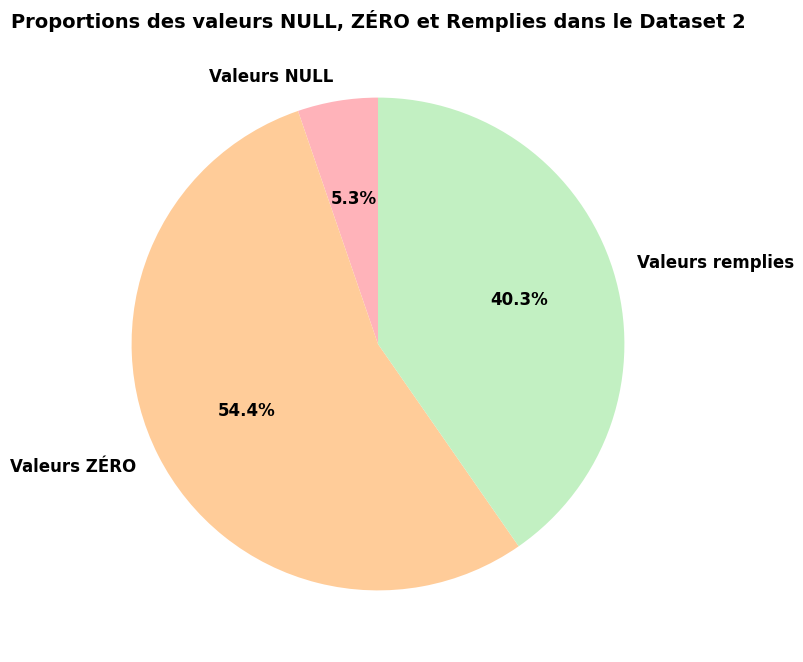

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Valeurs NULL': 40247,
    'Valeurs ZÉRO': 416067,
    'Valeurs remplies': 308379,
}

# Pie chart with beautiful pastel colors
labels = list(data.keys())
sizes = list(data.values())
colors = ['#ffb3ba', '#ffcc99', '#c2f0c2']  # Soft pastel colors

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proportions des valeurs NULL, ZÉRO et Remplies dans le Dataset 2', fontsize=14, fontweight='bold')
plt.show()


## **Unique values**

In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in cow is 28
No. of unique values in date is 60
No. of unique values in hour is 24
No. of unique values in IN_ALLEYS is 38035
No. of unique values in REST is 33068
No. of unique values in EAT is 25247
No. of unique values in ACTIVITY_LEVEL is 38405
No. of unique values in oestrus is 2
No. of unique values in calving is 1
No. of unique values in lameness is 2
No. of unique values in mastitis is 2
No. of unique values in LPS is 0
No. of unique values in acidosis is 2
No. of unique values in other_disease is 2
No. of unique values in accidents is 1
No. of unique values in disturbance is 2
No. of unique values in mixing is 1
No. of unique values in management_changes is 2
No. of unique values in OK is 2


**Displaying Descriptive Statistics for Selected Columns**

In [ ]:
#removed LPS  columns since they only contain NaN values
cols = ["lameness", "mastitis", "IN_ALLEYS", "REST", "EAT", "ACTIVITY_LEVEL",
        "other_disease", "accidents", "disturbance", "mixing",'acidosis',
        "management_changes", "OK"]


# Descriptive statistics for the selected columns
print(df[cols].describe())


           lameness      mastitis     IN_ALLEYS          REST           EAT  \
count  40247.000000  40247.000000  40247.000000  40247.000000  40247.000000   
mean       0.009541      0.001789    760.710530   1882.717740    928.695103   
std        0.097213      0.042259    792.413836   1422.621457   1140.246258   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000    151.440500    339.821000      0.000000   
50%        0.000000      0.000000    471.975000   2013.400000    256.049000   
75%        0.000000      0.000000   1134.145000   3383.837500   1731.244500   
max        1.000000      1.000000   3599.999000   3599.999000   3599.999000   

       ACTIVITY_LEVEL  other_disease  accidents   disturbance   mixing  \
count    40247.000000   40247.000000    40247.0  40247.000000  40247.0   
mean        78.740548       0.004771        0.0      0.400129      0.0   
std        814.084152       0.068905        0.0      0.489930     

**data distribution**

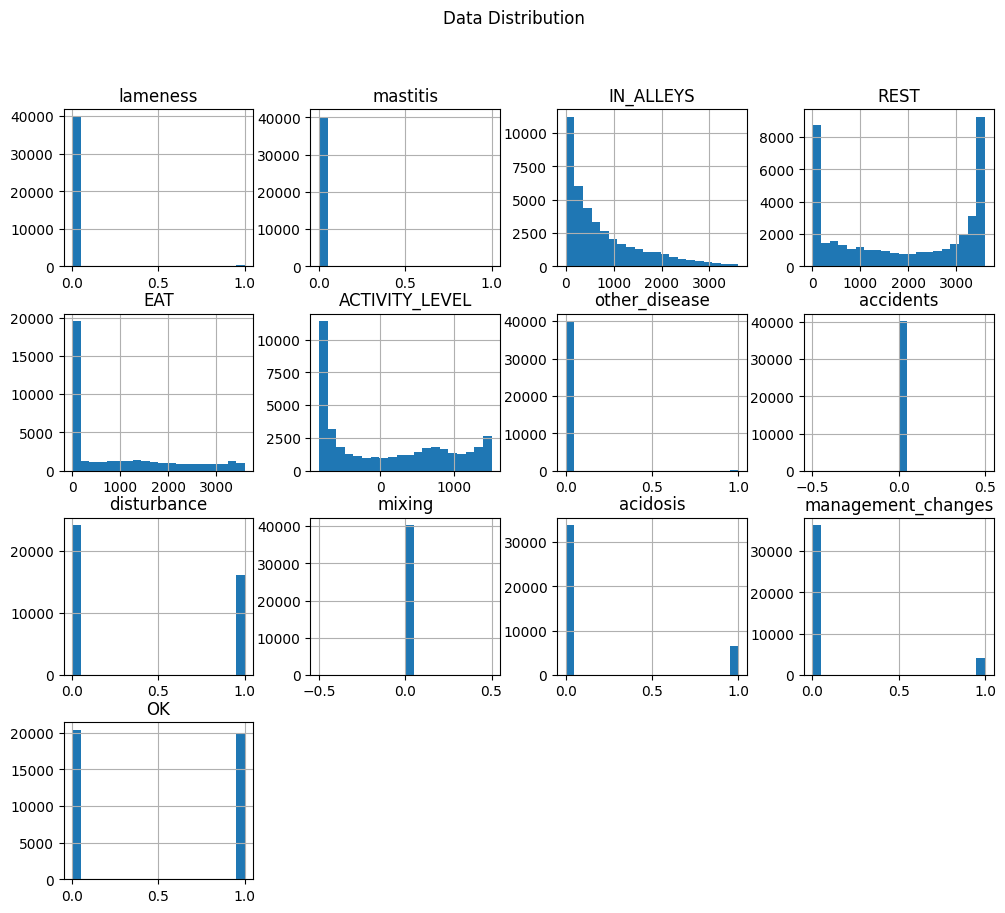

In [ ]:
# Plot histograms for the selected columns to understand their distributions
df[cols].hist(bins=20, figsize=(12, 10))
plt.suptitle("Data Distribution")
plt.show()


**Check for outliers values**

Détails du calcul théorique :

1. Plage minimale ( -828 ) :

Si une vache passe 1 heure entière (3600 secondes) au repos : -0.23 * 3600 + 0.16 * 0 + 0.42 * 0 = -828

2. Plage maximale ( 1512 ) :

Si une vache passe 1 heure entière (3600 secondes) à manger : -0.23 * 0 + 0.16 * 0 + 0.42 * 3600 = 1512

Plage théorique : [-828, 1512]
Plage observée  : [-828.00, 1512.00]


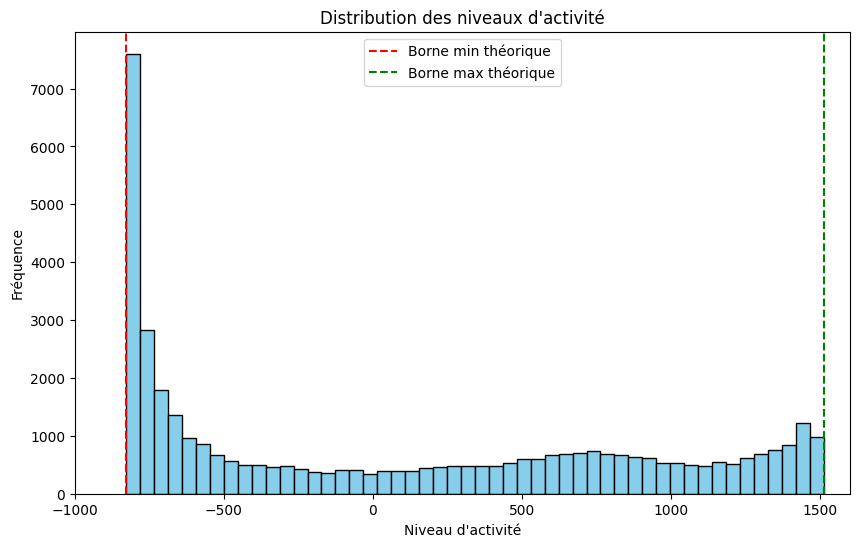


[ Rapport d'anomalies ]
- Valeurs hors plage théorique : 0 (0.00% du dataset)
- Aucune valeur hors plage détectée.


In [ ]:

min_theorique = -828
max_theorique = 1512

# Calculer les min/max observés
min_obs = df['ACTIVITY_LEVEL'].min()
max_obs = df['ACTIVITY_LEVEL'].max()

print(f"Plage théorique : [{min_theorique}, {max_theorique}]")
print(f"Plage observée  : [{min_obs:.2f}, {max_obs:.2f}]")

# Identifier les valeurs hors plage
outliers = df[(df['ACTIVITY_LEVEL'] < min_theorique) | (df['ACTIVITY_LEVEL'] > max_theorique)]
num_outliers = len(outliers)


plt.figure(figsize=(10, 6))
plt.hist(df['ACTIVITY_LEVEL'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=min_theorique, color='red', linestyle='--', label='Borne min théorique')
plt.axvline(x=max_theorique, color='green', linestyle='--', label='Borne max théorique')
plt.xlabel('Niveau d\'activité')
plt.ylabel('Fréquence')
plt.title('Distribution des niveaux d\'activité')
plt.legend()
plt.xlim(-1000, 1600)  # Pour mieux visualiser les éventuels outliers
plt.show()


print("\n[ Rapport d'anomalies ]")
print(f"- Valeurs hors plage théorique : {num_outliers} ({num_outliers/len(df)*100:.2f}% du dataset)")

if num_outliers > 0:
    print("- Exemples de lignes problématiques :")
    print(outliers[['DATETIME', 'ACTIVITY_LEVEL']].head())
else:
    print("- Aucune valeur hors plage détectée.")

**Behavioral features Correlation**

In [ ]:
# # Select numeric columns for correlation calculation
# cols = [ "IN_ALLEYS", "REST", "EAT", "ACTIVITY_LEVEL"]

# df_numeric = df[cols].select_dtypes(include=['number'])

# # Calculate the correlation matrix
# df_corr = df_numeric.corr()

# # Display the correlation matrix as a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix of Selected Columns")
# plt.show()
#

Text(0.5, 1.0, 'Corrélations entre les comportements')

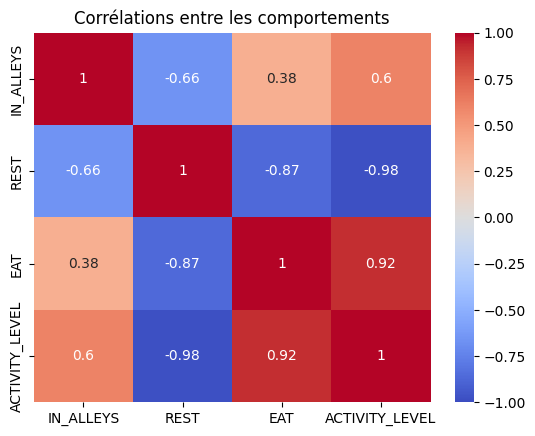

In [ ]:
import seaborn as sns
sns.heatmap(df[['IN_ALLEYS','REST','EAT','ACTIVITY_LEVEL']].corr(method='spearman'),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélations entre les comportements")

**Target classes correlation**

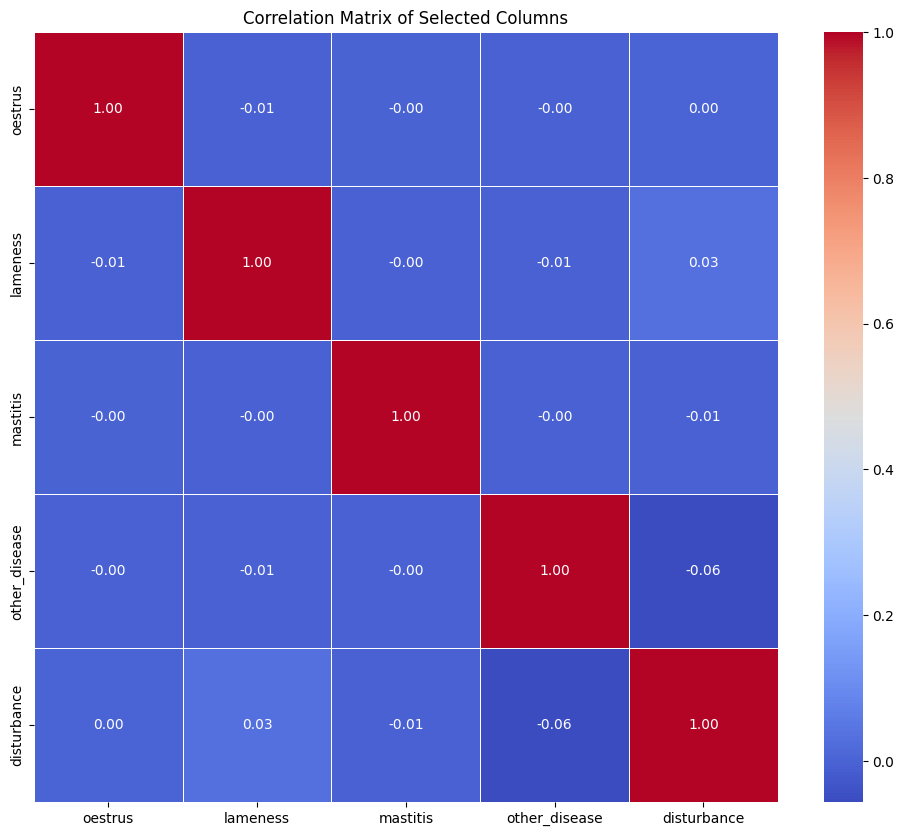

In [ ]:
# Select numeric columns for correlation calculation
cols = [
       'oestrus', 'lameness', 'mastitis',
       'other_disease', 'disturbance']

df_numeric = df[cols].select_dtypes(include=['number'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Suppose you have already loaded your dataset into a DataFrame
# Example: df = pd.read_csv('your_dataset.csv')

# Liste des colonnes à tester
cols = ['oestrus', 'lameness', 'mastitis', 'other_disease', 'disturbance']

# Appliquer le test du Chi-deux pour chaque paire de colonnes
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        # Créer une table de contingence
        contingency_table = pd.crosstab(df[cols[i]], df[cols[j]])

        # Appliquer le test du Chi-deux
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"Test du Chi-deux entre {cols[i]} et {cols[j]} :")
        print(f"Statistique Chi2 = {chi2:.4f}, p-value = {p:.4f}")

        # Interpréter le résultat
        if p < 0.05:
            print(f"Il y a une association significative entre {cols[i]} et {cols[j]}.\n")
        else:
            print(f"Aucune association significative entre {cols[i]} et {cols[j]}.\n")


Test du Chi-deux entre oestrus et lameness :
Statistique Chi2 = 0.7694, p-value = 0.3804
Aucune association significative entre oestrus et lameness.

Test du Chi-deux entre oestrus et mastitis :
Statistique Chi2 = 0.0000, p-value = 1.0000
Aucune association significative entre oestrus et mastitis.

Test du Chi-deux entre oestrus et other_disease :
Statistique Chi2 = 0.1144, p-value = 0.7352
Aucune association significative entre oestrus et other_disease.

Test du Chi-deux entre oestrus et disturbance :
Statistique Chi2 = 0.4558, p-value = 0.4996
Aucune association significative entre oestrus et disturbance.

Test du Chi-deux entre lameness et mastitis :
Statistique Chi2 = 0.0515, p-value = 0.8205
Aucune association significative entre lameness et mastitis.

Test du Chi-deux entre lameness et other_disease :
Statistique Chi2 = 0.9824, p-value = 0.3216
Aucune association significative entre lameness et other_disease.

Test du Chi-deux entre lameness et disturbance :
Statistique Chi2 = 41

**Behavioral features vs target classes correlation**

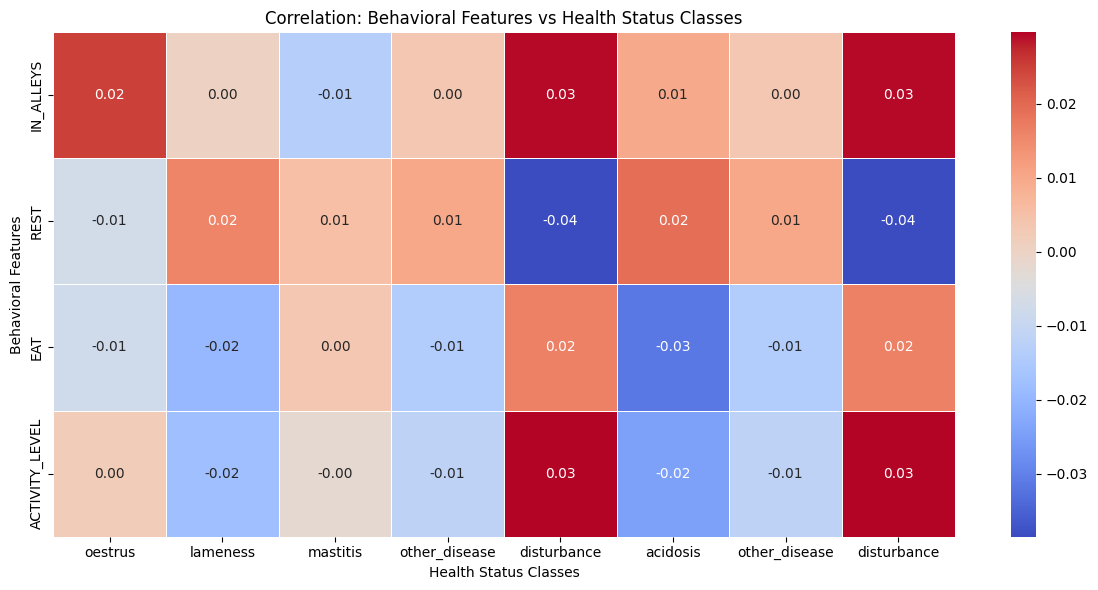

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Behavioral features
behavior_cols = ["IN_ALLEYS", "REST", "EAT", "ACTIVITY_LEVEL"]

# Health status target classes
target_cols = [
    'oestrus', 'lameness', 'mastitis',
    'other_disease', 'disturbance','acidosis',
       'other_disease', 'disturbance'
]


behavior_df = df[behavior_cols].select_dtypes(include='number')
target_df = df[target_cols].select_dtypes(include='number')

# Compute correlation between behavior and target columns
corr_matrix = behavior_df.corrwith(target_df, axis=0)  # This gives a Series, but not a full matrix


full_corr_matrix = behavior_df.corrwith(target_df, axis=0)
full_corr_matrix = pd.DataFrame(index=behavior_cols, columns=target_cols)

for b_col in behavior_cols:
    for t_col in target_cols:
        full_corr_matrix.loc[b_col, t_col] = df[b_col].corr(df[t_col])

full_corr_matrix = full_corr_matrix.astype(float)


plt.figure(figsize=(12, 6))
sns.heatmap(full_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation: Behavioral Features vs Health Status Classes")
plt.xlabel("Health Status Classes")
plt.ylabel("Behavioral Features")
plt.tight_layout()
plt.show()



📌 Tableau des médianes (Present vs Absent) :

📊 Medianes des groupes pour les résultats significatifs :



,Feature,Target,Median (Present),Median (Absent)
0,IN_ALLEYS,oestrus,528.64,471.80
1,IN_ALLEYS,mastitis,291.09,472.50
2,IN_ALLEYS,acidosis,480.50,471.04
3,IN_ALLEYS,disturbance,490.13,459.85
4,EAT,lameness,17.18,261.92
5,EAT,acidosis,164.10,276.23
6,EAT,disturbance,336.25,200.24
7,EAT,other_disease,79.75,258.88
8,REST,lameness,2691.95,2006.96
9,REST,acidosis,2154.02,1985.10


ANOVA Results Overview:


,Feature,Target,F-value,p-value,Eta_sq,Significant
0,IN_ALLEYS,oestrus,25.10,0.0000,0.001,True
4,IN_ALLEYS,disturbance,34.15,0.0000,0.001,True
9,EAT,acidosis,39.46,0.0000,0.001,True
16,REST,disturbance,59.65,0.0000,0.001,True
21,ACTIVITY_LEVEL,acidosis,24.30,0.0000,0.001,True
22,ACTIVITY_LEVEL,disturbance,35.35,0.0000,0.001,True
7,EAT,lameness,15.07,0.0001,0.000,True
15,REST,acidosis,14.71,0.0001,0.000,True
19,ACTIVITY_LEVEL,lameness,12.66,0.0004,0.000,True
10,EAT,disturbance,10.78,0.0010,0.000,True



Post-Hoc Tests for Significant Results:

IN_ALLEYS ~ oestrus:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,306.8348,0.0,186.7918,426.8778,True



IN_ALLEYS ~ mastitis:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-248.8941,0.0077,-432.0846,-65.7036,True



IN_ALLEYS ~ acidosis:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,21.1184,0.0491,0.0863,42.1505,True



IN_ALLEYS ~ disturbance:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,47.0952,0.0,31.2995,62.8909,True



EAT ~ lameness:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-226.958,0.0001,-341.5357,-112.3803,True



EAT ~ acidosis:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-96.9519,0.0,-127.2027,-66.7011,True



EAT ~ disturbance:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,38.0862,0.001,15.3504,60.8221,True



EAT ~ other_disease:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-232.8915,0.0048,-394.5542,-71.2287,True



REST ~ lameness:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,232.9706,0.0014,90.0098,375.9314,True



REST ~ acidosis:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,73.8653,0.0001,36.1114,111.6191,True



REST ~ disturbance:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-111.7122,0.0,-140.0612,-83.3631,True



REST ~ other_disease:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,207.3874,0.0439,5.68,409.0947,True



ACTIVITY_LEVEL ~ lameness:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-148.4972,0.0004,-230.3029,-66.6915,True



ACTIVITY_LEVEL ~ acidosis:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-54.3299,0.0,-75.9317,-32.7281,True



ACTIVITY_LEVEL ~ disturbance:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,49.2253,0.0,32.9978,65.4527,True



ACTIVITY_LEVEL ~ other_disease:


group1,group2,meandiff,p-adj,lower,upper,reject
Absent,Present,-139.4165,0.0179,-254.8398,-23.9932,True



Visualization of Significant Effects:


C:\Users\ayagr\AppData\Local\Temp\ipykernel_24940\2149893693.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ayagr\AppData\Local\Temp\ipykernel_24940\2149893693.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ayagr\AppData\Local\Temp\ipykernel_24940\2149893693.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ayagr\AppData\Local\Temp\ipykernel_24940\2149893693.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

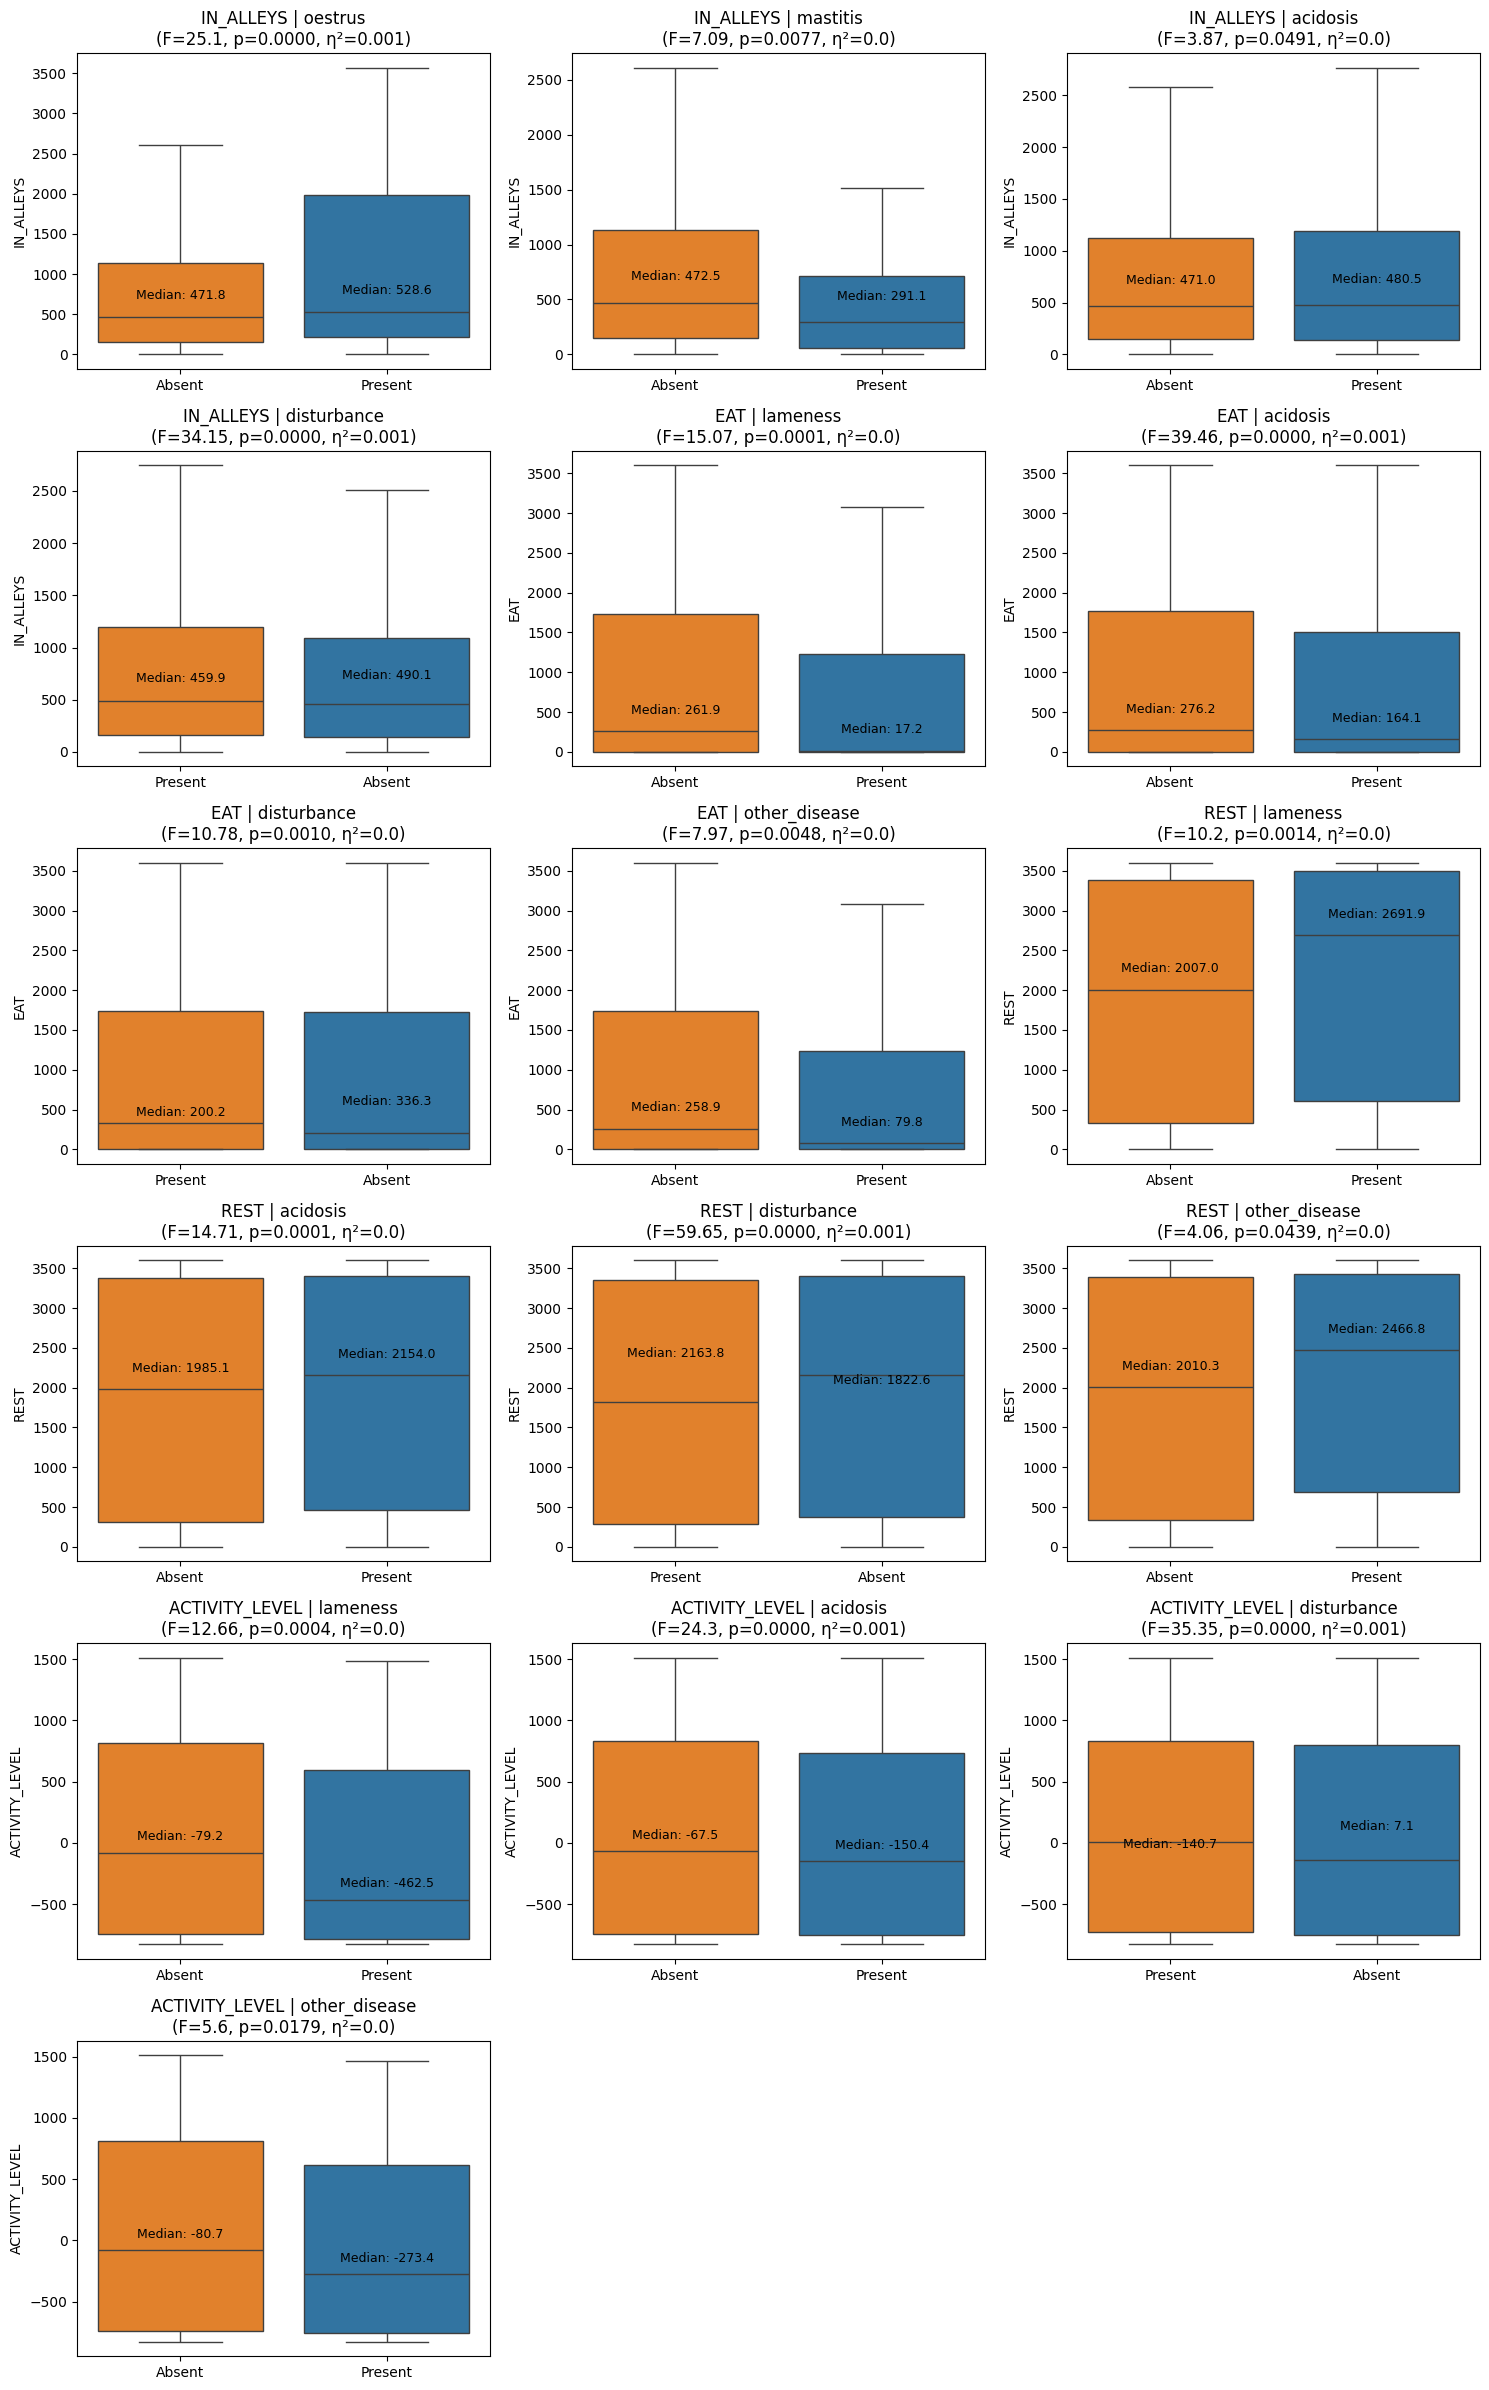

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# 1. Data Preparation
targets = ['oestrus', 'lameness', 'mastitis', 'acidosis', 'disturbance', 'other_disease']
features = ['IN_ALLEYS', 'EAT', 'REST', 'ACTIVITY_LEVEL']

# Convert binary targets to boolean for clarity
df[targets] = df[targets].astype(bool)

# 2. Automated ANOVA Testing
def run_anova(df, features, targets):
    results = []
    for feature in features:
        for target in targets:
            # Split data into groups
            groups = [df[df[target]][feature], df[~df[target]][feature]]

            # One-way ANOVA
            f_val, p_val = f_oneway(*groups)

            # Calculate effect size (Eta squared)
            ss_between = sum(len(g)*(g.mean()-df[feature].mean())**2 for g in groups)
            ss_total = sum((df[feature] - df[feature].mean())**2)
            eta_sq = ss_between/ss_total

            results.append({
                'Feature': feature,
                'Target': target,
                'F-value': round(f_val, 2),
                'p-value': f"{p_val:.4f}",
                'Eta_sq': round(eta_sq, 3),
                'Significant': p_val < 0.05
            })
    return pd.DataFrame(results)

anova_results = run_anova(df, features, targets)

# 3. Post-Hoc Analysis (for significant results)
def run_tukey(df, feature, target):
    tukey = pairwise_tukeyhsd(
        endog=df[feature],
        groups=df[target].map({True: 'Present', False: 'Absent'}),
        alpha=0.05
    )
    return tukey.summary()

# 4. Visualization
def plot_significant_results(results_df, n_cols=3):
    sig_results = results_df[results_df['Significant']]
    n_plots = len(sig_results)
    n_rows = int(np.ceil(n_plots / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, (_, row) in enumerate(sig_results.iterrows()):
        feature = row['Feature']
        target = row['Target']
        ax = axes[i]

        # Prepare plot data
        plot_data = df[[feature, target]].copy()
        plot_data['Group'] = df[target].map({True: 'Present', False: 'Absent'})

        # Create boxplot
        sns.boxplot(
            x='Group',
            y=feature,
            data=plot_data,
            ax=ax,
            showfliers=False,
            palette=['#ff7f0e', '#1f77b4']
        )

        # Calculate medians
        medians = plot_data.groupby('Group')[feature].median()

        # Annotate medians
        for j, group in enumerate(['Absent', 'Present']):
            median_val = medians[group]
            ax.text(j, median_val + 0.05 * plot_data[feature].max(),  # Slightly above the box
                    f"Median: {median_val:.1f}",
                    ha='center', va='bottom', fontsize=9, color='black')

        # Titles and labels
        ax.set_title(f"{feature} | {target}\n(F={row['F-value']}, p={row['p-value']}, η²={row['Eta_sq']})")
        ax.set_xlabel("")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
def display_medians(df, anova_results):
    print("\n📊 Medianes des groupes pour les résultats significatifs :\n")
    sig_results = anova_results[anova_results['Significant']]

    median_table = []

    for _, row in sig_results.iterrows():
        feature = row['Feature']
        target = row['Target']

        group_present = df[df[target]][feature]
        group_absent = df[~df[target]][feature]

        median_present = group_present.median()
        median_absent = group_absent.median()

        median_table.append({
            'Feature': feature,
            'Target': target,
            'Median (Present)': round(median_present, 2),
            'Median (Absent)': round(median_absent, 2)
        })

    return pd.DataFrame(median_table)
print("\n📌 Tableau des médianes (Present vs Absent) :")
display(display_medians(df, anova_results))


# 5. Execute Analysis
print("ANOVA Results Overview:")
display(anova_results.sort_values(['Significant', 'p-value'], ascending=[False, True]))

print("\nPost-Hoc Tests for Significant Results:")
sig_mask = anova_results['Significant']
for _, row in anova_results[sig_mask].iterrows():
    print(f"\n{row['Feature']} ~ {row['Target']}:")
    display(run_tukey(df, row['Feature'], row['Target']))

print("\nVisualization of Significant Effects:")
plot_significant_results(anova_results)

In [ ]:
# # Define your full desired list
# features = ['IN_ALLEYS', 'EAT', 'REST', 'ACTIVITY_LEVEL']
# targets = ['oestrus', 'lameness', 'mastitis', 'acidosis','disturbance','other_disease']


# df = df[features + targets].copy()

# # Convert binary targets to categorical
# for target in targets:
#     df[target] = df[target].astype('category')


In [ ]:
# # Initialize results storage
# anova_results = []

# # Iterate through all feature-target combinations
# for feature in features:
#     for target in targets:
#         # Group data by target class
#         groups = [df[df[target] == val][feature] for val in df[target].cat.categories]

#         # One-way ANOVA
#         f_stat, p_val = f_oneway(*groups)

#         # Store results
#         anova_results.append({
#             'Feature': feature,
#             'Target': target,
#             'F-statistic': round(f_stat, 2),
#             'p-value': round(p_val, 4),
#             'Significant': p_val < 0.05  # Mark statistically significant results
#         })

# # Convert to DataFrame
# results_df = pd.DataFrame(anova_results)

In [ ]:
# # Filter significant results
# sig_results = results_df[results_df['Significant']]

# # Run Tukey HSD for each significant pair
# for _, row in sig_results.iterrows():
#     print(f"\nPost-hoc Tukey HSD for {row['Feature']} ~ {row['Target']}:")
#     tukey = pairwise_tukeyhsd(
#         endog=df[row['Feature']],
#         groups=df[row['Target']],
#         alpha=0.05
#     )
#     print(tukey.summary())

In [ ]:
# import matplotlib.pyplot as plt

# # Set up grid
# fig, axes = plt.subplots(nrows=len(targets), ncols=len(features), figsize=(15, 10))

# # Plot boxplots for all combinations
# for i, target in enumerate(targets):
#     for j, feature in enumerate(features):
#         sns.boxplot(
#             x=df[target],
#             y=df[feature],
#             ax=axes[i,j],
#             showfliers=False  # Hide outliers for cleaner plots
#         )
#         axes[i,j].set_title(f"{feature} by {target}")
#         axes[i,j].set_xlabel("")

# plt.tight_layout()
# plt.show()

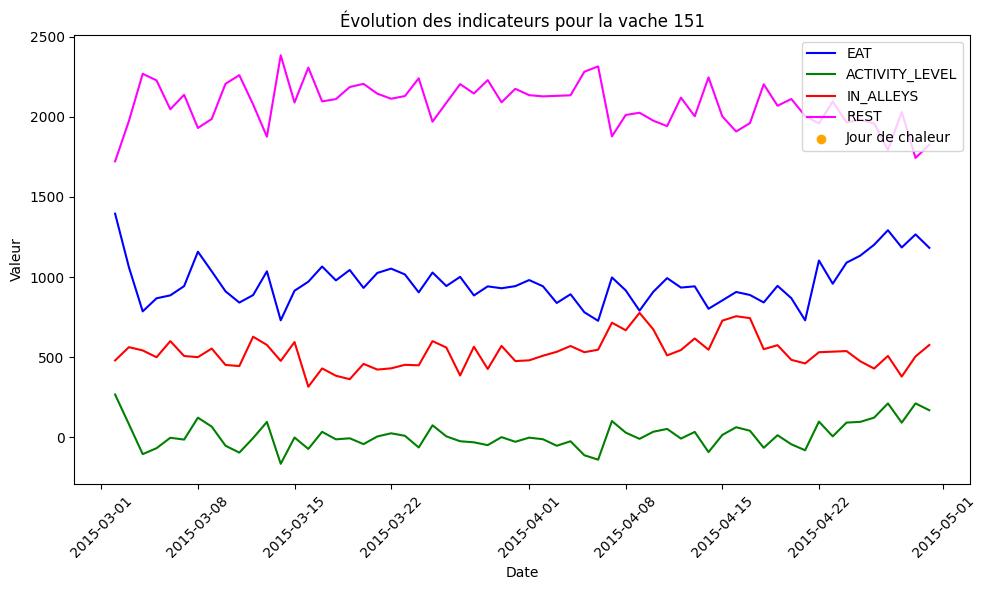

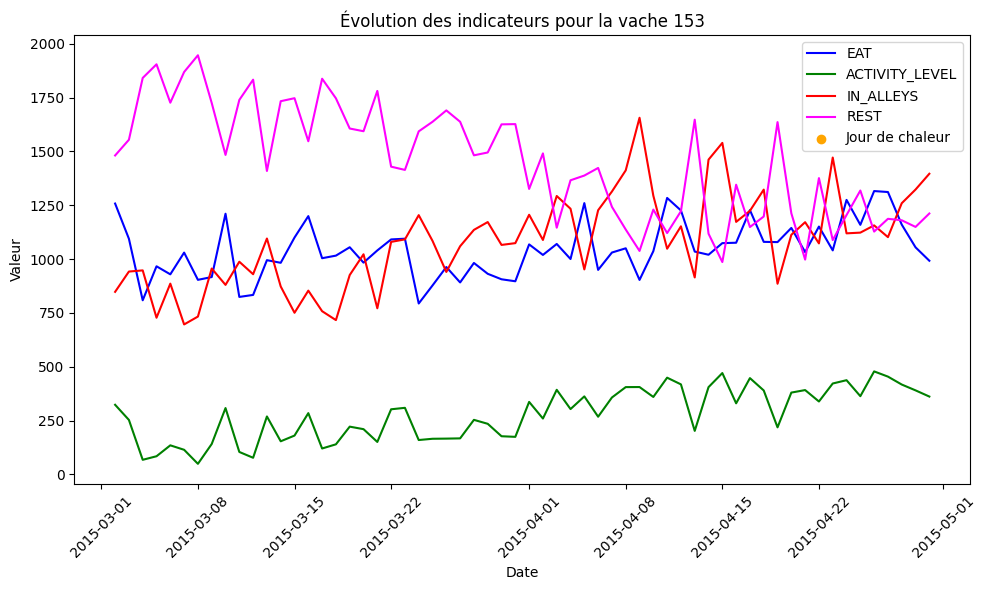

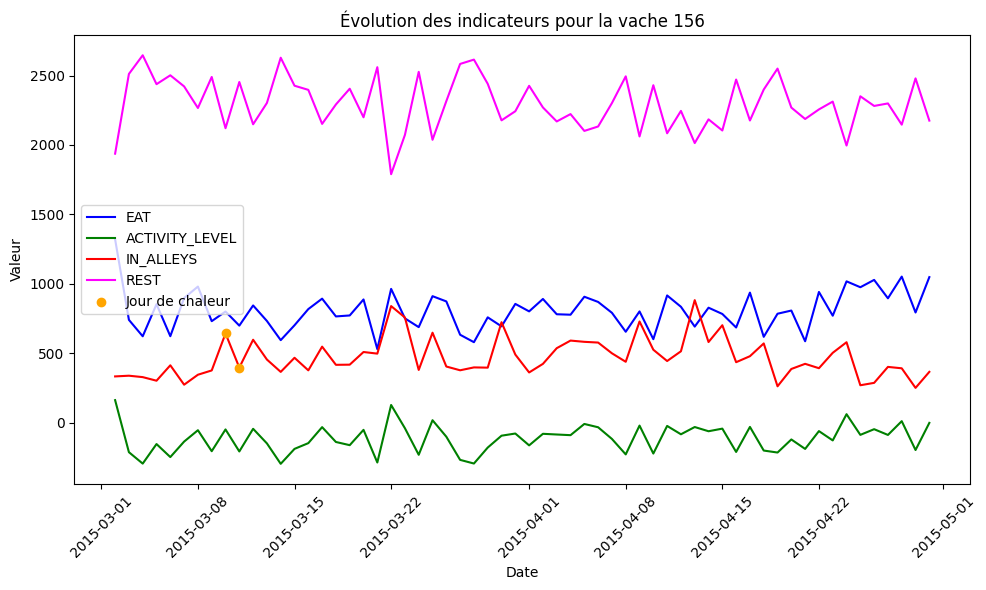

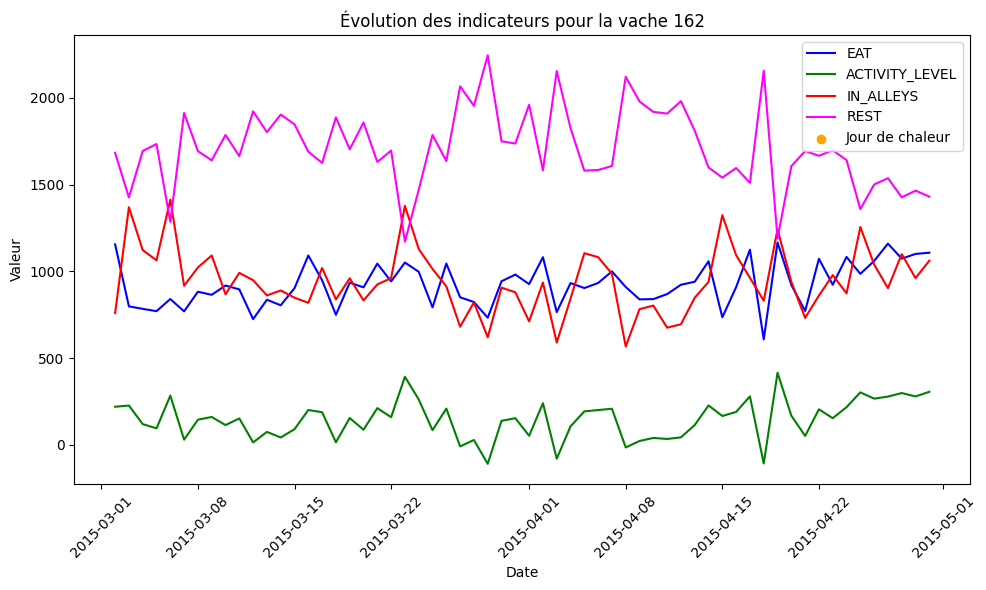

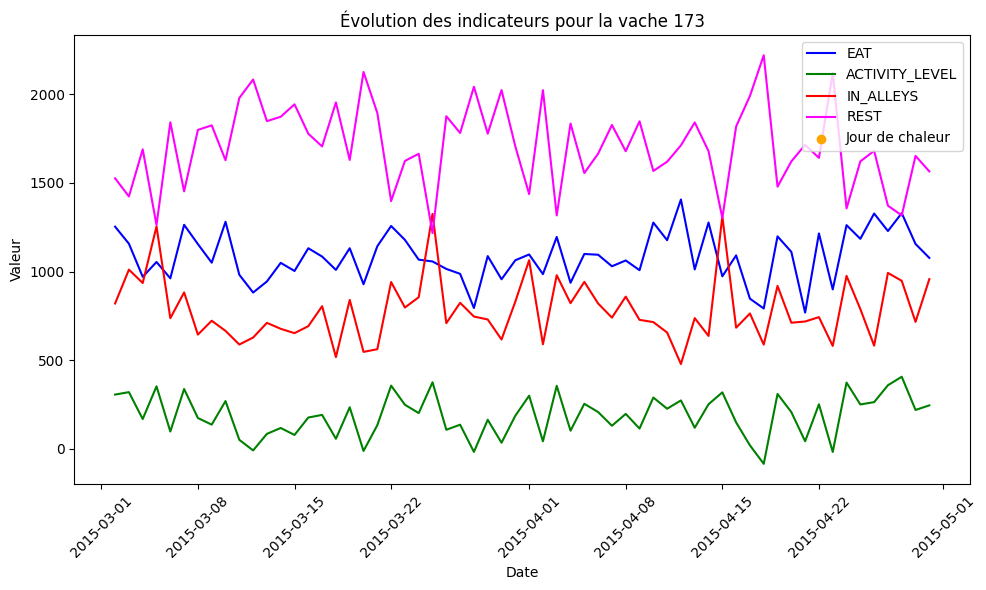

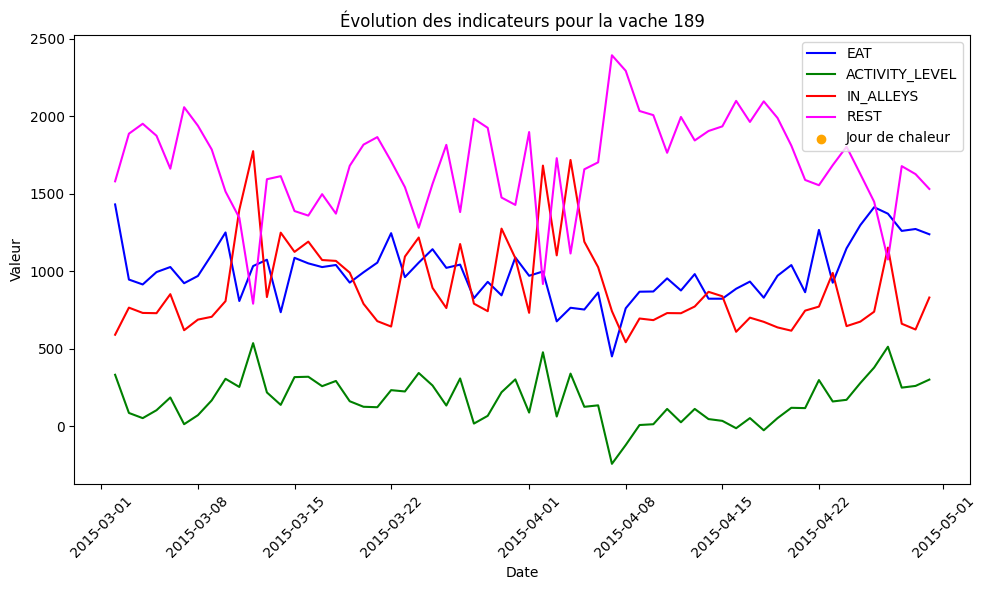

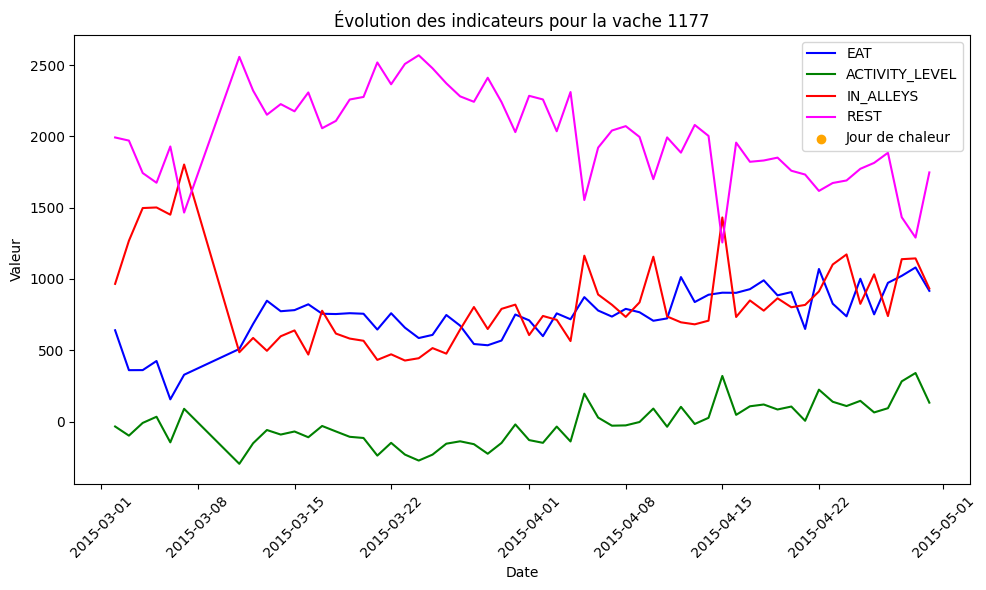

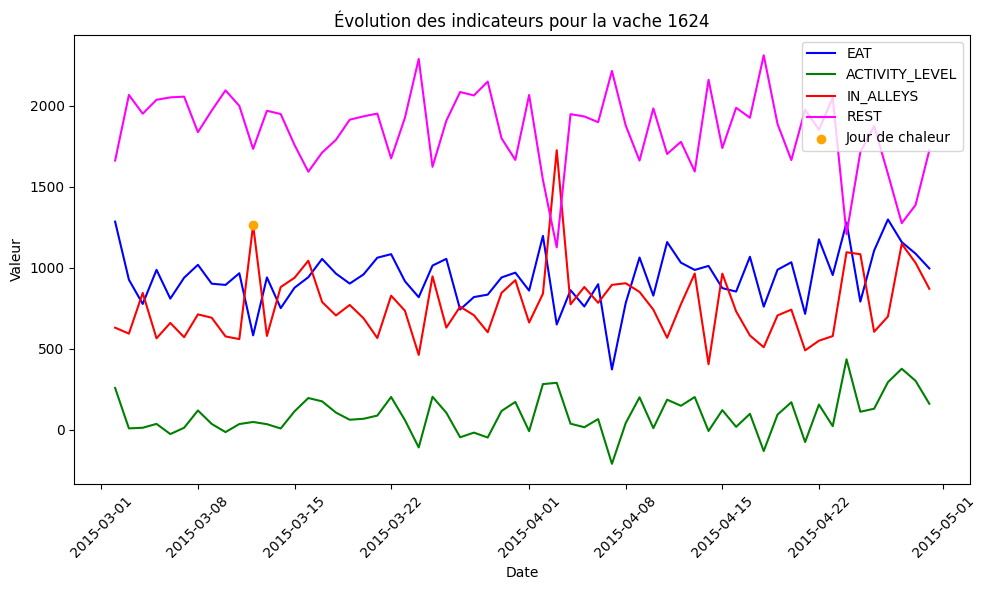

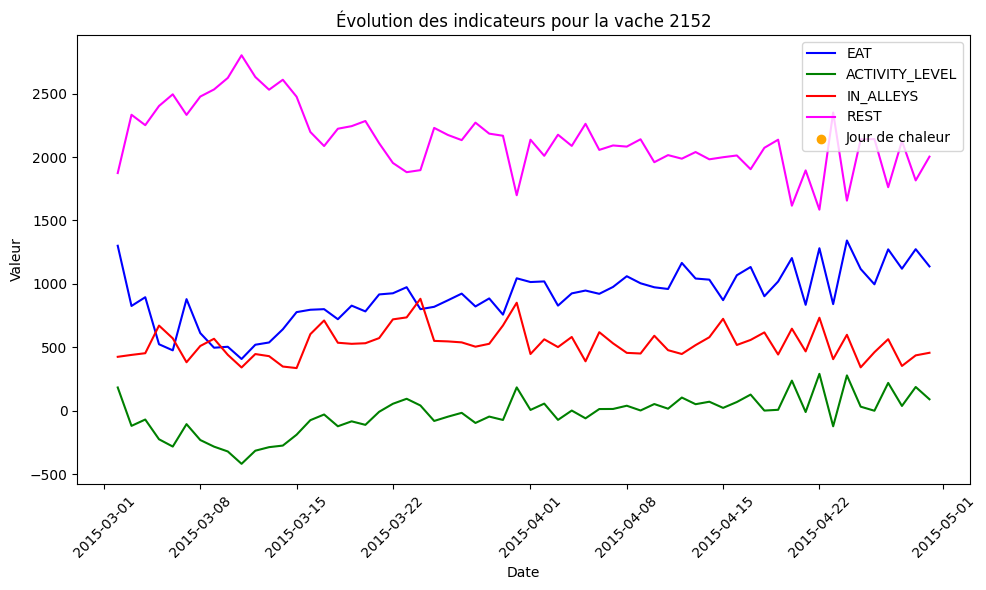

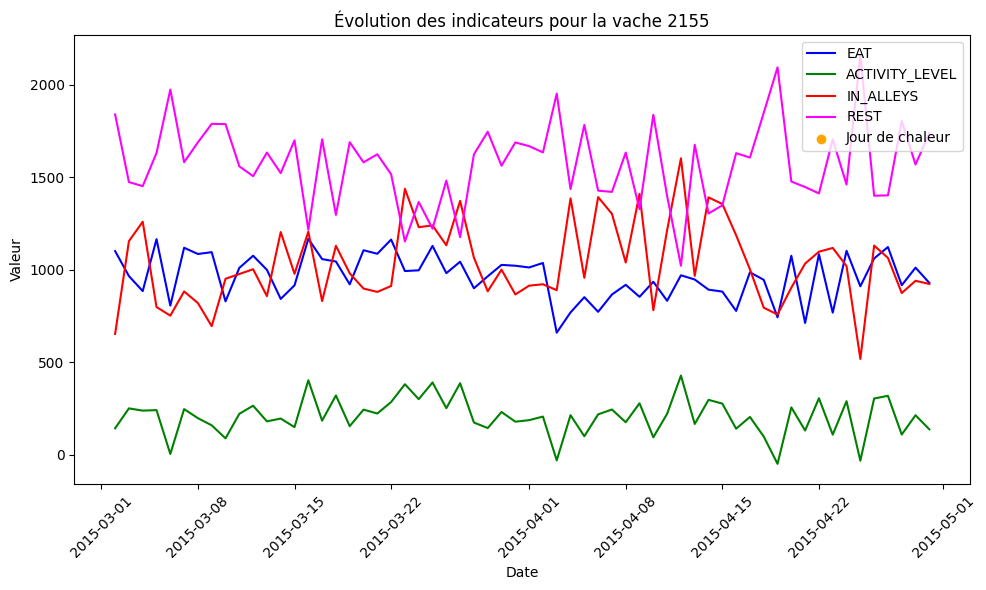

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'])

# Calculer la moyenne par jour pour chaque vache
df_grouped = df.groupby(['cow', 'date']).agg({
    'ACTIVITY_LEVEL': 'mean',
    'EAT': 'mean',
    'IN_ALLEYS': 'mean',
    'REST': 'mean',
}).reset_index()

df_grouped['is_heat'] = df.groupby(['cow', 'date'])['oestrus'].max().reset_index()['oestrus'].apply(lambda x: 1 if x == 1 else 0)

# Sélectionner 10 vaches
sample_vaches = df_grouped['cow'].unique()[:10]  # Prendre les 10 premières vaches

# Tracer l'évolution de chaque indicateur pour chaque vache
for cow_id in sample_vaches:
    cow_data = df_grouped[df_grouped['cow'] == cow_id]

    plt.figure(figsize=(10, 6))

    # Tracer 'EAT'
    plt.plot(cow_data['date'], cow_data['EAT'], label='EAT', color='blue')

    # Tracer 'ACTIVITY_LEVEL'
    plt.plot(cow_data['date'], cow_data['ACTIVITY_LEVEL'], label='ACTIVITY_LEVEL', color='green')

    # Tracer 'IN_ALLEYS'
    plt.plot(cow_data['date'], cow_data['IN_ALLEYS'], label='IN_ALLEYS', color='red')
      # Tracer 'REST'
    plt.plot(cow_data['date'], cow_data['REST'], label='REST', color='magenta')

    # Marquer les jours de chaleur (oestrus == 1)
    plt.scatter(cow_data[cow_data['is_heat'] == 1]['date'],
                cow_data[cow_data['is_heat'] == 1]['IN_ALLEYS'],

                color='orange', label='Jour de chaleur', zorder=5)

    plt.title(f'Évolution des indicateurs pour la vache {cow_id}')
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [ ]:
# Step 5: Define RMSE function
def rmse(x):
    return np.sqrt(np.mean(np.square(x)))

In [ ]:
# Step 6: Daily aggregation function
def aggregate_daily_stats(group):
    stats = {}
    for col in behavioral_features:
        stats[f'{col}_min'] = group[col].min()
        stats[f'{col}_std'] = group[col].std()
        stats[f'{col}_q25'] = group[col].quantile(0.25)
        stats[f'{col}_q50'] = group[col].quantile(0.50)
        stats[f'{col}_q75'] = group[col].quantile(0.75)
        stats[f'{col}_rmse'] = rmse(group[col])
    for col in health_indicators:
        stats[col] = group[col].max()  # max to detect if event happened
    return pd.Series(stats)

C:\Users\ayagr\AppData\Local\Temp\ipykernel_24940\3011296649.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_aggregated = df.groupby(['cow', 'date']).apply(aggregate_daily_stats).reset_index()


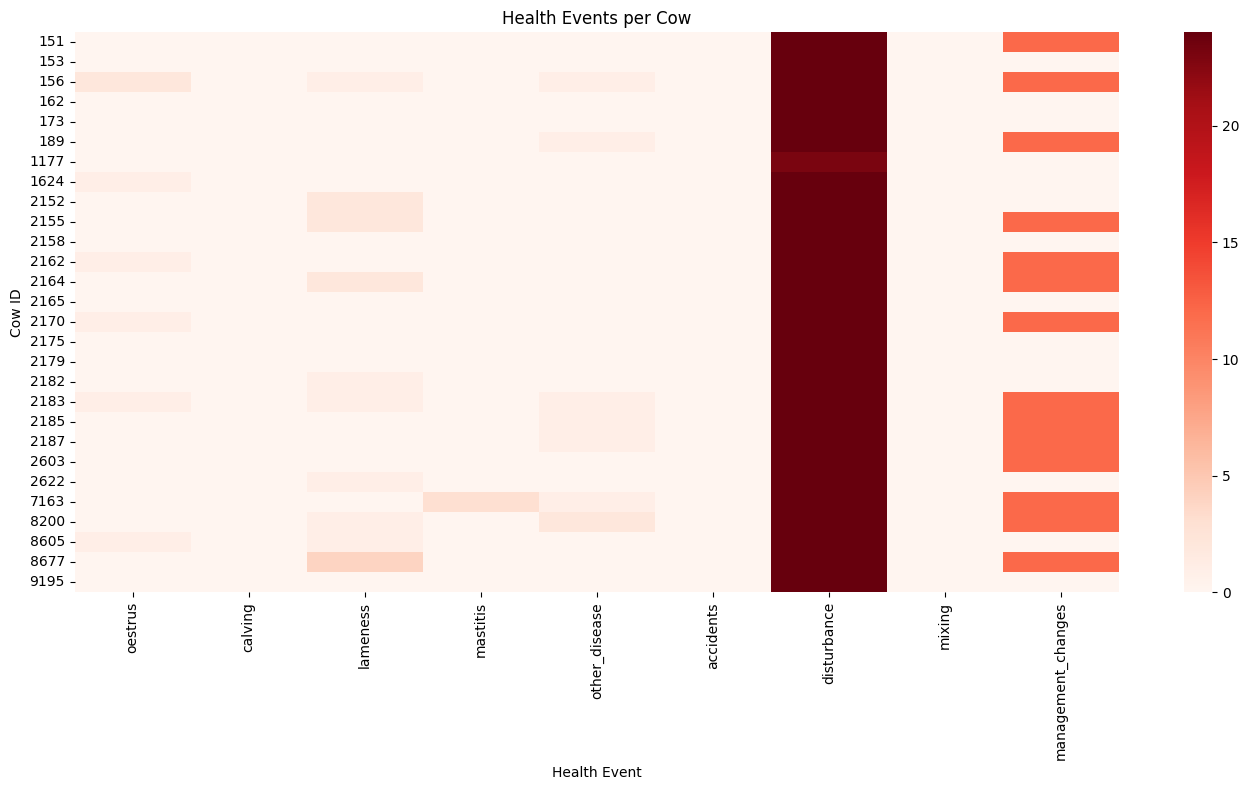

In [ ]:
# Step 7: Aggregate by cow and date
daily_aggregated = df.groupby(['cow', 'date']).apply(aggregate_daily_stats).reset_index()
health_cols = ['oestrus', 'calving', 'lameness', 'mastitis', 'other_disease',
               'accidents', 'disturbance', 'mixing', 'management_changes' ]

event_matrix = daily_aggregated.groupby('cow')[health_cols].sum()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(event_matrix, cmap='Reds', annot=False)
plt.title('Health Events per Cow')
plt.xlabel('Health Event')
plt.ylabel('Cow ID')
plt.tight_layout()
plt.show()